ref : https://github.com/YutaroOgawa/pytorch_advanced/blob/master/9_video_classification_eco/9-4_3_ECO_DataLoader.ipynb

In [1]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import torchvision

In [2]:
class BasicConv(nn.Module):
    '''ECOの2D Netモジュールの最初のモジュール'''

    def __init__(self):
        super(BasicConv, self).__init__()

        self.conv1_7x7_s2 = nn.Conv2d(3, 64, kernel_size=(
            7, 7), stride=(2, 2), padding=(3, 3))
        self.conv1_7x7_s2_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv1_relu_7x7 = nn.ReLU(inplace=True)
        self.pool1_3x3_s2 = nn.MaxPool2d(
            kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
        self.conv2_3x3_reduce = nn.Conv2d(
            64, 64, kernel_size=(1, 1), stride=(1, 1))
        self.conv2_3x3_reduce_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_relu_3x3_reduce = nn.ReLU(inplace=True)
        self.conv2_3x3 = nn.Conv2d(64, 192, kernel_size=(
            3, 3), stride=(1, 1), padding=(1, 1))
        self.conv2_3x3_bn = nn.BatchNorm2d(
            192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_relu_3x3 = nn.ReLU(inplace=True)
        self.pool2_3x3_s2 = nn.MaxPool2d(
            kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)

    def forward(self, x):
        out = self.conv1_7x7_s2(x)
        out = self.conv1_7x7_s2_bn(out)
        out = self.conv1_relu_7x7(out)
        out = self.pool1_3x3_s2(out)
        out = self.conv2_3x3_reduce(out)
        out = self.conv2_3x3_reduce_bn(out)
        out = self.conv2_relu_3x3_reduce(out)
        out = self.conv2_3x3(out)
        out = self.conv2_3x3_bn(out)
        out = self.conv2_relu_3x3(out)
        out = self.pool2_3x3_s2(out)
        return out

In [3]:

class InceptionA(nn.Module):
    '''InceptionA'''

    def __init__(self):
        super(InceptionA, self).__init__()

        self.inception_3a_1x1 = nn.Conv2d(
            192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_1x1_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_1x1 = nn.ReLU(inplace=True)

        self.inception_3a_3x3_reduce = nn.Conv2d(
            192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_3x3_reduce_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_3x3_reduce = nn.ReLU(inplace=True)
        self.inception_3a_3x3 = nn.Conv2d(
            64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_3x3_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_3x3 = nn.ReLU(inplace=True)

        self.inception_3a_double_3x3_reduce = nn.Conv2d(
            192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_double_3x3_reduce_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_double_3x3_reduce = nn.ReLU(inplace=True)
        self.inception_3a_double_3x3_1 = nn.Conv2d(
            64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_double_3x3_1_bn = nn.BatchNorm2d(
            96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_double_3x3_1 = nn.ReLU(inplace=True)
        self.inception_3a_double_3x3_2 = nn.Conv2d(
            96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_double_3x3_2_bn = nn.BatchNorm2d(
            96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_double_3x3_2 = nn.ReLU(inplace=True)

        self.inception_3a_pool = nn.AvgPool2d(
            kernel_size=3, stride=1, padding=1)
        self.inception_3a_pool_proj = nn.Conv2d(
            192, 32, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_pool_proj_bn = nn.BatchNorm2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3a_relu_pool_proj = nn.ReLU(inplace=True)

    def forward(self, x):

        out1 = self.inception_3a_1x1(x)
        out1 = self.inception_3a_1x1_bn(out1)
        out1 = self.inception_3a_relu_1x1(out1)

        out2 = self.inception_3a_3x3_reduce(x)
        out2 = self.inception_3a_3x3_reduce_bn(out2)
        out2 = self.inception_3a_relu_3x3_reduce(out2)
        out2 = self.inception_3a_3x3(out2)
        out2 = self.inception_3a_3x3_bn(out2)
        out2 = self.inception_3a_relu_3x3(out2)

        out3 = self.inception_3a_double_3x3_reduce(x)
        out3 = self.inception_3a_double_3x3_reduce_bn(out3)
        out3 = self.inception_3a_relu_double_3x3_reduce(out3)
        out3 = self.inception_3a_double_3x3_1(out3)
        out3 = self.inception_3a_double_3x3_1_bn(out3)
        out3 = self.inception_3a_relu_double_3x3_1(out3)
        out3 = self.inception_3a_double_3x3_2(out3)
        out3 = self.inception_3a_double_3x3_2_bn(out3)
        out3 = self.inception_3a_relu_double_3x3_2(out3)

        out4 = self.inception_3a_pool(x)
        out4 = self.inception_3a_pool_proj(out4)
        out4 = self.inception_3a_pool_proj_bn(out4)
        out4 = self.inception_3a_relu_pool_proj(out4)

        outputs = [out1, out2, out3, out4]

        return torch.cat(outputs, 1)

In [4]:
class InceptionB(nn.Module):
    '''InceptionB'''

    def __init__(self):
        super(InceptionB, self).__init__()
        
        self.inception_3b_1x1 = nn.Conv2d(
            256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_1x1_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_1x1 = nn.ReLU(inplace=True)

        self.inception_3b_3x3_reduce = nn.Conv2d(
            256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_3x3_reduce_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_3x3_reduce = nn.ReLU(inplace=True)
        self.inception_3b_3x3 = nn.Conv2d(
            64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_3x3_bn = nn.BatchNorm2d(
            96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_3x3 = nn.ReLU(inplace=True)

        self.inception_3b_double_3x3_reduce = nn.Conv2d(
            256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_double_3x3_reduce_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_double_3x3_reduce = nn.ReLU(inplace=True)
        self.inception_3b_double_3x3_1 = nn.Conv2d(
            64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_double_3x3_1_bn = nn.BatchNorm2d(
            96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_double_3x3_1 = nn.ReLU(inplace=True)
        self.inception_3b_double_3x3_2 = nn.Conv2d(
            96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_double_3x3_2_bn = nn.BatchNorm2d(
            96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_double_3x3_2 = nn.ReLU(inplace=True)

        self.inception_3b_pool = nn.AvgPool2d(
            kernel_size=3, stride=1, padding=1)
        self.inception_3b_pool_proj = nn.Conv2d(
            256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_pool_proj_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3b_relu_pool_proj = nn.ReLU(inplace=True)

    def forward(self, x):
        
        out1 = self.inception_3b_1x1(x)
        out1 = self.inception_3b_1x1_bn(out1)
        out1 = self.inception_3b_relu_1x1(out1)

        out2 = self.inception_3b_3x3_reduce(x)
        out2 = self.inception_3b_3x3_reduce_bn(out2)
        out2 = self.inception_3b_relu_3x3_reduce(out2)
        out2 = self.inception_3b_3x3(out2)
        out2 = self.inception_3b_3x3_bn(out2)
        out2 = self.inception_3b_relu_3x3(out2)

        out3 = self.inception_3b_double_3x3_reduce(x)
        out3 = self.inception_3b_double_3x3_reduce_bn(out3)
        out3 = self.inception_3b_relu_double_3x3_reduce(out3)
        out3 = self.inception_3b_double_3x3_1(out3)
        out3 = self.inception_3b_double_3x3_1_bn(out3)
        out3 = self.inception_3b_relu_double_3x3_1(out3)
        out3 = self.inception_3b_double_3x3_2(out3)
        out3 = self.inception_3b_double_3x3_2_bn(out3)
        out3 = self.inception_3b_relu_double_3x3_2(out3)

        out4 = self.inception_3b_pool(x)
        out4 = self.inception_3b_pool_proj(out4)
        out4 = self.inception_3b_pool_proj_bn(out4)
        out4 = self.inception_3b_relu_pool_proj(out4)

        outputs = [out1, out2, out3, out4]

        return torch.cat(outputs, 1)

In [5]:
class InceptionC(nn.Module):
    '''InceptionC'''

    def __init__(self):
        super(InceptionC, self).__init__()

        self.inception_3c_double_3x3_reduce = nn.Conv2d(
            320, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3c_double_3x3_reduce_bn = nn.BatchNorm2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3c_relu_double_3x3_reduce = nn.ReLU(inplace=True)
        self.inception_3c_double_3x3_1 = nn.Conv2d(
            64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3c_double_3x3_1_bn = nn.BatchNorm2d(
            96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.inception_3c_relu_double_3x3_1 = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.inception_3c_double_3x3_reduce(x)
        out = self.inception_3c_double_3x3_reduce_bn(out)
        out = self.inception_3c_relu_double_3x3_reduce(out)
        out = self.inception_3c_double_3x3_1(out)
        out = self.inception_3c_double_3x3_1_bn(out)
        out = self.inception_3c_relu_double_3x3_1(out)

        return out

In [6]:

class ECO_2D(nn.Module):
    def __init__(self):
        super(ECO_2D, self).__init__()

        # BasicConvモジュール
        self.basic_conv = BasicConv()

        # Inceptionモジュール
        self.inception_a = InceptionA()
        self.inception_b = InceptionB()
        self.inception_c = InceptionC()

    def forward(self, x):
        '''
        入力xのサイズtorch.Size([batch_num, 3, 224, 224]))
        '''
        out = self.basic_conv(x)
        out = self.inception_a(out)
        out = self.inception_b(out)
        out = self.inception_c(out)

        return out

In [7]:

class Resnet_3D_3(nn.Module):
    '''Resnet_3D_3'''

    def __init__(self):
        super(Resnet_3D_3, self).__init__()
        
        self.res3a_2 = nn.Conv3d(96, 128, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        
        self.res3a_bn = nn.BatchNorm3d(
            128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res3a_relu = nn.ReLU(inplace=True)

        self.res3b_1 = nn.Conv3d(128, 128, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        self.res3b_1_bn = nn.BatchNorm3d(
            128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res3b_1_relu = nn.ReLU(inplace=True)
        self.res3b_2 = nn.Conv3d(128, 128, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        
        self.res3b_bn = nn.BatchNorm3d(
            128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res3b_relu = nn.ReLU(inplace=True)

    def forward(self, x):

        residual = self.res3a_2(x)
        out = self.res3a_bn(residual)
        out = self.res3a_relu(out)

        out = self.res3b_1(out)
        out = self.res3b_1_bn(out)
        out = self.res3b_relu(out)
        out = self.res3b_2(out)

        out += residual

        out = self.res3b_bn(out)
        out = self.res3b_relu(out)

        return out

In [8]:
class Resnet_3D_4(nn.Module):
    '''Resnet_3D_4'''

    def __init__(self):
        super(Resnet_3D_4, self).__init__()

        self.res4a_1 = nn.Conv3d(128, 256, kernel_size=(
            3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
        self.res4a_1_bn = nn.BatchNorm3d(
            256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res4a_1_relu = nn.ReLU(inplace=True)
        self.res4a_2 = nn.Conv3d(256, 256, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        
        self.res4a_down = nn.Conv3d(128, 256, kernel_size=(
            3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
        
        self.res4a_bn = nn.BatchNorm3d(
            256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res4a_relu = nn.ReLU(inplace=True)
        
        self.res4b_1 = nn.Conv3d(256, 256, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        self.res4b_1_bn = nn.BatchNorm3d(
            256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res4b_1_relu = nn.ReLU(inplace=True)
        self.res4b_2 = nn.Conv3d(256, 256, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        
        self.res4b_bn = nn.BatchNorm3d(
            256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res4b_relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = self.res4a_down(x)

        out = self.res4a_1(x)
        out = self.res4a_1_bn(out)
        out = self.res4a_1_relu(out)

        out = self.res4a_2(out)

        out += residual

        residual2 = out

        out = self.res4a_bn(out)
        out = self.res4a_relu(out)

        out = self.res4b_1(out)

        out = self.res4b_1_bn(out)
        out = self.res4b_1_relu(out)

        out = self.res4b_2(out)

        out += residual2

        out = self.res4b_bn(out)
        out = self.res4b_relu(out)

        return out

In [9]:
class Resnet_3D_5(nn.Module):
    '''Resnet_3D_5'''

    def __init__(self):
        super(Resnet_3D_5, self).__init__()
        
        self.res5a_1 = nn.Conv3d(256, 512, kernel_size=(
            3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
        self.res5a_1_bn = nn.BatchNorm3d(
            512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res5a_1_relu = nn.ReLU(inplace=True)
        self.res5a_2 = nn.Conv3d(512, 512, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        
        self.res5a_down = nn.Conv3d(256, 512, kernel_size=(
            3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
        
        self.res5a_bn = nn.BatchNorm3d(
            512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res5a_relu = nn.ReLU(inplace=True)
        
        self.res5b_1 = nn.Conv3d(512, 512, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        self.res5b_1_bn = nn.BatchNorm3d(
            512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res5b_1_relu = nn.ReLU(inplace=True)
        self.res5b_2 = nn.Conv3d(512, 512, kernel_size=(
            3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        
        self.res5b_bn = nn.BatchNorm3d(
            512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.res5b_relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = self.res5a_down(x)

        out = self.res5a_1(x)
        out = self.res5a_1_bn(out)
        out = self.res5a_1_relu(out)

        out = self.res5a_2(out)

        out += residual  # res5a

        residual2 = out

        out = self.res5a_bn(out)
        out = self.res5a_relu(out)

        out = self.res5b_1(out)

        out = self.res5b_1_bn(out)
        out = self.res5b_1_relu(out)

        out = self.res5b_2(out)

        out += residual2  # res5b

        out = self.res5b_bn(out)
        out = self.res5b_relu(out)

        return out

In [10]:
class ECO_3D(nn.Module):
    def __init__(self, frames):
        super(ECO_3D, self).__init__()

        # 3D_Resnetジュール
        self.res_3d_3 = Resnet_3D_3()
        self.res_3d_4 = Resnet_3D_4()
        self.res_3d_5 = Resnet_3D_5()

        # Global Average Pooling
        pool_kernel_size = self._get_pool_kernel_size(frames)
        self.global_pool = nn.AvgPool3d(
            # kernel_size=(4, 7, 7), stride=1, padding=0)
            kernel_size=pool_kernel_size, stride=1, padding=0)

    def forward(self, x):
        '''
        入力xのサイズtorch.Size([batch_num,frames, 96, 28, 28]))
        '''
        out = torch.transpose(x, 1, 2)  # テンソルの順番入れ替え
        out = self.res_3d_3(out)
        out = self.res_3d_4(out)
        out = self.res_3d_5(out)
        out = self.global_pool(out)
        
        # テンソルサイズを変更
        # torch.Size([batch_num, 512, 1, 1, 1])からtorch.Size([batch_num, 512])へ
        out =out.view(out.size()[0], out.size()[1])
        
        return out

    def _get_pool_kernel_size(self, frames):
        dummy_input = torch.randn(2, frames, 96, 28, 28)
        out = torch.transpose(dummy_input, 1, 2)
        out = self.res_3d_3(out)
        out = self.res_3d_4(out)
        out = self.res_3d_5(out)
        return out.shape[-3:]

In [11]:
class ECO_Lite(nn.Module):
    def __init__(self, frames):
        super(ECO_Lite, self).__init__()

        # 2D Netモジュール
        self.eco_2d = ECO_2D()

        # 3D Netモジュール
        self.eco_3d = ECO_3D(frames)

        # クラス分類の全結合層
        self.fc_final = nn.Linear(in_features=512, out_features=1, bias=True)

    def forward(self, x):
        '''
        入力xはtorch.Size([batch_num, num_segments=16, 3, 224, 224]))
        '''

        # 入力xの各次元のサイズを取得する
        bs, ns, c, h, w = x.shape

        # xを(bs*ns, c, h, w)にサイズ変換する
        out = x.reshape(-1, c, h, w)
        # （注釈）
        # PyTorchのConv2Dは入力のサイズが(batch_num, c, h, w)しか受け付けないため
        # (batch_num, num_segments, c, h, w)は処理できない
        # 今は2次元画像を独立に処理するので、num_segmentsはbatch_numの次元に押し込んでも良いため
        # (batch_num×num_segments, c, h, w)にサイズを変換する

        # 2D Netモジュール 出力torch.Size([batch_num×16, 96, 28, 28])
        out = self.eco_2d(out)

        # 2次元画像をテンソルを3次元用に変換する
        # num_segmentsをbatch_numの次元に押し込んだものを元に戻す
        out = out.reshape(-1, ns, 96, 28, 28)

        # 3D Netモジュール 出力torch.Size([batch_num, 512])
        out = self.eco_3d(out)

        # クラス分類の全結合層　出力torch.Size([batch_num, class_num=400])
        out = self.fc_final(out)

        return out

In [12]:
class VideoTransform():

    def __init__(self, resize, crop_size, mean, std):
        self.data_transform = {
            'train': torchvision.transforms.Compose([
                # DataAugumentation()  # 今回は省略
                GroupResize(int(resize)),  # 画像をまとめてリサイズ　
                GroupCenterCrop(crop_size),  # 画像をまとめてセンタークロップ
                GroupToTensor(),  # データをPyTorchのテンソルに
                GroupImgNormalize(mean, std),  # データを標準化
                Stack()  # 複数画像をframes次元で結合させる
            ]),
            'val': torchvision.transforms.Compose([
                GroupResize(int(resize)),  # 画像をまとめてリサイズ　
                GroupCenterCrop(crop_size),  # 画像をまとめてセンタークロップ
                GroupToTensor(),  # データをPyTorchのテンソルに
                GroupImgNormalize(mean, std),  # データを標準化
                Stack()  # 複数画像をframes次元で結合させる
            ])
        }

    def __call__(self, img_group, phase):
        """
        Parameters
        ----------
        phase : 'train' or 'val'
            前処理のモードを指定。
        """
        return self.data_transform[phase](img_group)

In [13]:
class GroupResize():
    ''' 画像をまとめてリスケールするクラス。
    画像の短い方の辺の長さがresizeに変換される。
    アスペクト比は保たれる。
    '''

    def __init__(self, resize, interpolation=Image.BILINEAR):
        '''リスケールする処理を用意'''
        self.rescaler = torchvision.transforms.Resize(resize, interpolation)

    def __call__(self, img_group):
        '''リスケールをimg_group(リスト)内の各imgに実施'''
        return [self.rescaler(img) for img in img_group]


class GroupCenterCrop():
    ''' 画像をまとめてセンタークロップするクラス。
        （crop_size, crop_size）の画像を切り出す。
    '''

    def __init__(self, crop_size):
        '''センタークロップする処理を用意'''
        self.ccrop = torchvision.transforms.CenterCrop(crop_size)

    def __call__(self, img_group):
        '''センタークロップをimg_group(リスト)内の各imgに実施'''
        return [self.ccrop(img) for img in img_group]


class GroupToTensor():
    ''' 画像をまとめてテンソル化するクラス。
    '''

    def __init__(self):
        '''テンソル化する処理を用意'''
        self.to_tensor = torchvision.transforms.ToTensor()

    def __call__(self, img_group):
        '''テンソル化をimg_group(リスト)内の各imgに実施
        0から1ではなく、0から255で扱うため、255をかけ算する。
        0から255で扱うのは、学習済みデータの形式に合わせるため
        '''

        return [self.to_tensor(img)*255 for img in img_group]


class GroupImgNormalize():
    ''' 画像をまとめて標準化するクラス。
    '''

    def __init__(self, mean, std):
        '''標準化する処理を用意'''
        self.normlize = torchvision.transforms.Normalize(mean, std)

    def __call__(self, img_group):
        '''標準化をimg_group(リスト)内の各imgに実施'''
        return [self.normlize(img) for img in img_group]


class Stack():
    ''' 画像を一つのテンソルにまとめるクラス。
    '''

    def __call__(self, img_group):
        '''img_groupはtorch.Size([3, 224, 224])を要素とするリスト
        '''
        ret = torch.cat([(x.flip(dims=[0])).unsqueeze(dim=0)
                         for x in img_group], dim=0)  # frames次元で結合
        # x.flip(dims=[0])は色チャネルをRGBからBGRへと順番を変えています（元の学習データがBGRであったため）
        # unsqueeze(dim=0)はあらたにframes用の次元を作成しています

        return ret

In [14]:

class VideoDataset(torch.utils.data.Dataset):
    """
    動画のDataset
    """

    def __init__(self, video_list, labels, phase, transform):
        self.video_list = video_list  # 動画画像のフォルダへのパスリスト
        self.labels = labels
        self.phase = phase  # train or val
        self.transform = transform  # 前処理

    def __len__(self):
        '''動画の数を返す'''
        return len(self.video_list)

    def __getitem__(self, index):
        '''
        前処理をした画像たちのデータとラベル、ラベルIDを取得
        '''
        imgs_transformed, label = self.pull_item(index)
        return imgs_transformed, label

    def pull_item(self, index):
        '''前処理をした画像たちのデータとラベル、ラベルIDを取得'''

        # 1. 画像たちをリストに読み込む
        img_files = self.video_list[index]  # 画像が格納されたフォルダ
        img_group = self._load_imgs(img_files)  # リストに読み込む

        # 3. 前処理を実施
        imgs_transformed = self.transform(img_group, phase=self.phase)

        return imgs_transformed, self.labels[index]

    def _load_imgs(self, img_files):
        '''画像をまとめて読み込み、リスト化する関数'''
        img_group = []  # 画像を格納するリスト

        for img_file in img_files:
            img = Image.open(img_file).convert('RGB')
            img_group.append(img)
        return img_group


In [19]:
!pip install fsspec s3fs japanize_matplotlib boto3 > /dev/null

ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: aiobotocore 1.2.2 has requirement botocore<1.19.53,>=1.19.52, but you'll have botocore 1.20.34 which is incompatible.


In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime, timedelta
import numpy as np
from fastprogress import progress_bar as pb
import seaborn as sns
import boto3
from typing import List
sns.set(font="IPAexGothic")

In [21]:
import warnings
warnings.simplefilter('ignore')

In [23]:
_aws_session = boto3.session.Session(
    region_name='ap-northeast-1',
    aws_access_key_id=os.environ["AWS_ACCESS_KEY_ID"],
    aws_secret_access_key=os.environ["AWS_SECRET_ACCESS_KEY"],
)

S3_resource = _aws_session.resource('s3')

S3_BUCKET_NAME = 'finapp-crypto-currency'

class S3:

    @staticmethod
    def save_file(
        local_filepath: str,
        s3_filepath: str,
        bucket_name: str = S3_BUCKET_NAME,
    ) -> None:
        """[summary]
        Args:
            local_filepath (str): [description]
            s3_filepath (str): [description]
            bucket_name (str, optional): [description]. Defaults to AWSConfig.S3_BUCKET_NAME.
        """
        bucket = S3_resource.Bucket(bucket_name)

        bucket.upload_file(
            local_filepath,
            s3_filepath
        )

    @staticmethod
    def get_filelist(
        basedir: str,
        bucket_name: str = S3_BUCKET_NAME,
        marker: str = '',
    ) -> List[str]:
        """[summary]
        Args:
            basedir (str): [description]
            bucket_name (str, optional): [description]. Defaults to AWSConfig.S3_BUCKET_NAME.
            marker (str, optional): [description]. Defaults to ''.
        Returns:
            List[str]: [description]
        """
        bucket = S3_resource.Bucket(bucket_name)
        objs = bucket.meta.client.list_objects(
            Bucket=bucket.name,
            Prefix=basedir if basedir[-1] == '/' else basedir + '/',
            Marker=marker,
        )

        s3_prefix = f's3://{bucket_name}/'
        s3_filelist = []

        while 'Contents' in objs:
            files = [o.get('Key') for o in objs.get('Contents')]

            s3_paths = [os.path.join(
                s3_prefix,
                file,
            ) for file in files]

            s3_filelist += s3_paths

            if 'IsTruncated' in objs:
                marker = files[-1]
                objs = bucket.meta.client.list_objects(
                    Bucket=bucket.name,
                    Prefix=basedir if basedir[-1] == '/' else basedir + '/',
                    Marker=marker,
                )
            else:
                break

        return s3_filelist

    @staticmethod
    def download_file(
        s3_filepath: str,
        local_filepath: str,
        bucket_name: str = S3_BUCKET_NAME,
    ) -> str:
        """[summary]
        Args:
            s3_filepath (str): [description]
            local_filepath (str): [description]
            bucket_name (str, optional): [description]. Defaults to AWSConfig.S3_BUCKET_NAME.
        Returns:
            str: [description]
        """
        bucket = S3_resource.Bucket(bucket_name)

        s3_prefix = f's3://{bucket_name}/'
        filepath = s3_filepath.replace(s3_prefix, '')
        object = bucket.Object(filepath)
        object.download_file(local_filepath)

        return local_filepath

In [24]:
def download_s3_img(
    s3_filepath_list,
    local_dir,
    product_code
):
    for s3_filepath in pb(s3_filepath_list):
        filename = s3_filepath.split('/')[-1]
        local_path = os.path.join(
            local_dir,
            product_code,
            filename
        )
        if not os.path.exists(os.path.dirname(local_path)):
            os.makedirs(os.path.dirname(local_path))
        S3.download_file(
            s3_filepath,
            local_path
        )

In [25]:
meta_files = [
    's3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv',
    's3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210320.csv',
    's3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210321.csv'
]

In [26]:
meta_dfs = {
    filepath: pd.read_csv(filepath) for filepath in meta_files
}

In [27]:
for fp, df in meta_dfs.items():
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.sort_values(by='datetime', inplace=True)

In [28]:
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv']

,datetime,mid_price,s3_image_filepath
0,2021-03-19 16:41:41.289418,6321744.0,s3://finapp-crypto-currency/board_image/BTC_JP...
1,2021-03-19 16:41:46.161454,6320339.0,s3://finapp-crypto-currency/board_image/BTC_JP...
2,2021-03-19 16:41:48.519369,6320734.0,s3://finapp-crypto-currency/board_image/BTC_JP...
3,2021-03-19 16:41:51.145452,6320651.0,s3://finapp-crypto-currency/board_image/BTC_JP...
4,2021-03-19 16:41:56.232862,6320651.0,s3://finapp-crypto-currency/board_image/BTC_JP...
...,...,...,...
3265,2021-03-19 21:10:11.569192,6432392.0,s3://finapp-crypto-currency/board_image/BTC_JP...
3266,2021-03-19 21:10:23.220409,6430625.0,s3://finapp-crypto-currency/board_image/BTC_JP...
3267,2021-03-19 21:10:28.575747,6424680.0,s3://finapp-crypto-currency/board_image/BTC_JP...
3268,2021-03-19 21:10:41.904332,6425458.0,s3://finapp-crypto-currency/board_image/BTC_JP...


In [49]:
# download_s3_img(
#     meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv']['s3_image_filepath'],
#     local_dir='/content/drive/MyDrive/data/crypto_board',
#     product_code='BTC_JPY'
# )

In [50]:
# download_s3_img(
#     meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210320.csv']['s3_image_filepath'],
#     local_dir='/content/drive/MyDrive/data/crypto_board',
#     product_code='BTC_JPY'
# )

In [51]:
# download_s3_img(
#     meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210321.csv']['s3_image_filepath'],
#     local_dir='/content/drive/MyDrive/data/crypto_board',
#     product_code='BTC_JPY'
# )

In [29]:
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv']['local_image_filepath'] = meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv']['s3_image_filepath'].map(
    lambda x: f'/content/drive/MyDrive/data/crypto_board/BTC_JPY/{x.split("/")[-1]}'
)
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210320.csv']['local_image_filepath'] = meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210320.csv']['s3_image_filepath'].map(
    lambda x: f'/content/drive/MyDrive/data/crypto_board/BTC_JPY/{x.split("/")[-1]}'
)
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210321.csv']['local_image_filepath'] = meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210321.csv']['s3_image_filepath'].map(
    lambda x: f'/content/drive/MyDrive/data/crypto_board/BTC_JPY/{x.split("/")[-1]}'
)

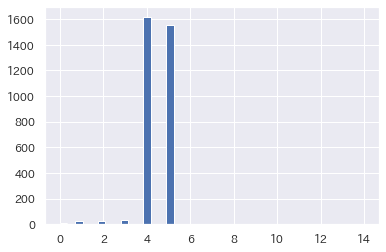

In [30]:
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv']['datetime'].diff().map(lambda x: x.seconds).hist(bins=40)

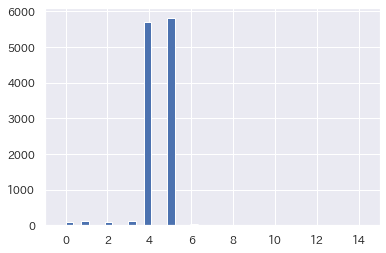

In [32]:
plt.xlim(-1, 15)
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210320.csv']['datetime'].diff().map(lambda x: x.seconds).hist(bins=400)

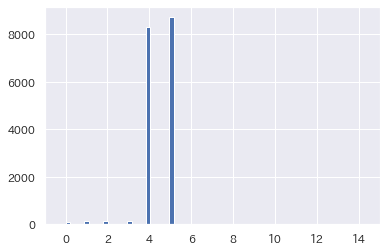

In [36]:
plt.xlim(-1, 15)
meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210321.csv']['datetime'].diff().map(lambda x: x.seconds).hist(bins=40)

In [31]:
def create_video_list(df_meta, images_per_video: int = 60):
    video_files = []
    mean_change_rates = []

    for dt_target in pb(df_meta['datetime']):
        dt_start = dt_target - timedelta(minutes=20)
        df_video_selected = df_meta[
            (df_meta['datetime'] >= dt_start) & (df_meta['datetime'] <= dt_target)
        ]
        if len(df_video_selected) < images_per_video:
            continue
        df_video_selected = df_video_selected[-images_per_video:]
        dt_pred = dt_target + timedelta(minutes=3)
        df_pred_selected = df_meta[
            (df_meta['datetime'] > dt_target) & (df_meta['datetime'] <= dt_pred)
        ]
        if len(df_pred_selected) < 2 or (df_pred_selected.iloc[-1]['datetime'] - df_pred_selected.iloc[0]['datetime']).seconds < 150:
            continue
        base_midprice = df_video_selected.iloc[-1]['mid_price']
        ave_change_rates = [(v-base_midprice)/base_midprice for v in df_pred_selected['mid_price']]
        ave_change_rate = sum(ave_change_rates) / len(ave_change_rates)
        video_files.append(df_video_selected['local_image_filepath'].tolist())
        mean_change_rates.append(ave_change_rate)

    return video_files, mean_change_rates

In [32]:
train_video_files, mean_returns = create_video_list(meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210319.csv'])
train_video_files_2, mean_returns_2 = create_video_list(meta_dfs['s3://finapp-crypto-currency/board_image/meta/BTC_JPY/20210320.csv'])
train_video_files += train_video_files_2
mean_returns += mean_returns_2

In [33]:
len(train_video_files)

15097

In [34]:
all([len(vf)==60 for vf in train_video_files])

True

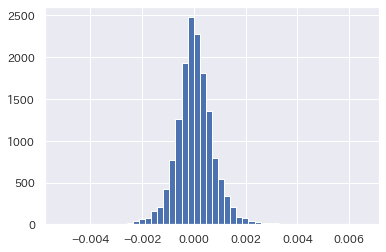

In [35]:
_ = plt.hist(mean_returns, bins=50)

In [36]:
mean_returns = 100 * np.array(mean_returns) 

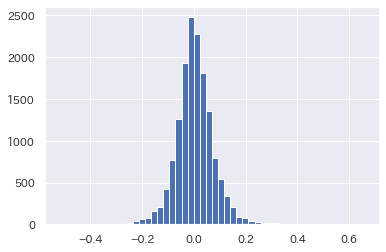

In [37]:
_ = plt.hist(mean_returns, bins=50)

In [38]:
resize, crop_size = 224, 224
mean, std = [104, 117, 123], [1, 1, 1]
video_transform = VideoTransform(resize, crop_size, mean, std)

In [39]:
train_dataset = VideoDataset(
    train_video_files, mean_returns,
    phase="train",
    transform=video_transform
)

In [41]:
batch_size = 2
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [39]:
batch, labels = next(iter(train_dataloader))

In [40]:
labels.shape

torch.Size([4])

In [41]:
labels

tensor([-0.0168, -0.0491,  0.1191, -0.0593], dtype=torch.float64)

In [42]:
batch.shape

torch.Size([4, 60, 3, 224, 224])

In [43]:
plt.rcParams["axes.grid"] = False

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


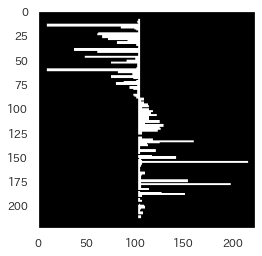

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


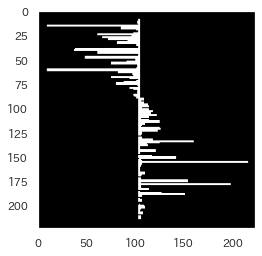

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


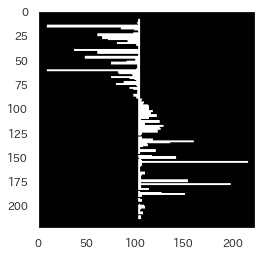

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


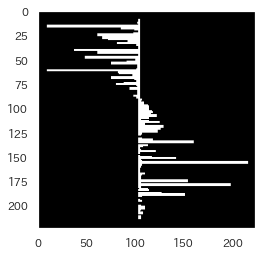

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


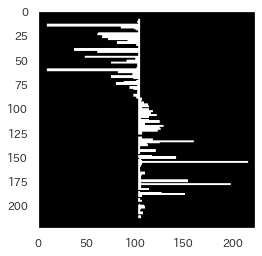

In [44]:
for i in range(5):
    plt.imshow(batch[0, i, :, :, :].permute(1, 2, 0).numpy())
    plt.show()

In [40]:
frames = 60

In [41]:
eco_model = ECO_Lite(frames)

In [44]:
eco_model(batch)

tensor([[0.0981],
        [0.0882],
        [0.1043],
        [0.0884]], grad_fn=<AddmmBackward>)

In [44]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(eco_model.parameters(), lr=0.01, weight_decay=5e-4)

In [45]:
N_EPOCHS = 10

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [43]:
device

device(type='cuda')

In [ ]:

eco_model.to(device)
eco_model.train()

loss_history = []

for epoch in pb(range(N_EPOCHS)):
    epoch_loss = 0
    i = 0

    for videos, labels in pb(train_dataloader):
        i += 1

        optimizer.zero_grad()

        preds = eco_model(videos.to(device))
        loss = criterion(preds.double(), labels.double().to(device))

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * videos.size(0)

        if i % 100 == 0:
            torch.save(eco_model.state_dict(), '/content/drive/MyDrive/data/model/crypot_board_eco3d_model')

    epoch_loss /= len(train_dataloader.dataset)

    loss_history.append(epoch_loss)

    print(f'epoch : {n}, loss : {epoch_loss}')

In [50]:
epoch_loss

0.008668354013188842

In [44]:
eco_model.load_state_dict(torch.load('/content/drive/MyDrive/data/model/crypot_board_eco3d_model'))

<All keys matched successfully>

In [45]:
_ = eco_model.to(device)

In [46]:
batch_size = 2
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [48]:
eco_model.eval()
# eco_model.cpu()

n = 0
n_correct = 0
i = 0

for videos, labels in pb(train_dataloader):
    i += 1
    n += len(labels)
    preds = eco_model(videos.to(device))
    n_correct += sum((preds.detach().cpu().numpy().flatten() * labels.cpu().detach().numpy().flatten())>0)
    if i % 30 == 0:
        print(f'acc : {n_correct/n}')

acc : 0.5666666666666667
acc : 0.5416666666666666
acc : 0.5277777777777778
acc : 0.5458333333333333
acc : 0.5333333333333333
acc : 0.5277777777777778
acc : 0.5214285714285715
acc : 0.5270833333333333
acc : 0.524074074074074
acc : 0.5216666666666666
acc : 0.5272727272727272
acc : 0.5347222222222222
acc : 0.5269230769230769
acc : 0.5273809523809524
acc : 0.5255555555555556
acc : 0.5197916666666667
acc : 0.5205882352941177
acc : 0.5175925925925926
acc : 0.5157894736842106
acc : 0.5158333333333334
acc : 0.5142857142857142
acc : 0.5151515151515151
acc : 0.5152173913043478
acc : 0.5118055555555555
acc : 0.508
acc : 0.5038461538461538
acc : 0.504320987654321
acc : 0.5083333333333333
acc : 0.5091954022988506
acc : 0.5094444444444445
acc : 0.5102150537634409
acc : 0.509375
acc : 0.5095959595959596
acc : 0.5068627450980392
acc : 0.5071428571428571
acc : 0.5078703703703704
acc : 0.5049549549549549
acc : 0.5035087719298246
acc : 0.5025641025641026
acc : 0.5025
acc : 0.5
acc : 0.5023809523809524
ac

KeyboardInterrupt: ignored